# 미니 프로젝트: 가위바위보 분류기를 만들자

### PIL 라이브러리 import

In [2]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 이미지 사이즈 변경

In [55]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

861  images to be resized.
861  images resized.
가위 이미지 resize 완료!


In [56]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

969  images to be resized.
969  images resized.
바위 이미지 resize 완료!


In [57]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

832  images to be resized.
832  images resized.
보 이미지 resize 완료!


### load_data()

In [3]:
import numpy as np

def load_data(img_path, number_of_data=2662):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2662 입니다.
x_train shape: (2662, 28, 28, 3)
y_train shape: (2662,)


라벨:  2


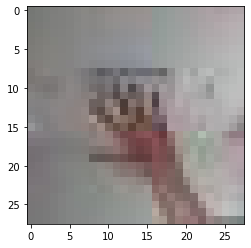

In [103]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2661])
print('라벨: ', y_train[2661])

### 딥러닝 네트워크 설계

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              820224    
_________________________________________________________________
dense_3 (Dense)              (

### 딥러닝 네트워크 학습

In [5]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
84/84 [==============================] - 6s 29ms/step - loss: 13.7164 - accuracy: 0.4928
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.9015
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9503
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9787
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.9655
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9945
Epoch 7/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9916
Epoch 8/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9947
Epoch 9/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9989
Epoch 10/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000


### 테스트

In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_norm.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [7]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 1s - loss: 1.0796 - accuracy: 0.6533
test_loss: 1.0796098709106445 
test_accuracy: 0.6533333325386047


### 후기

훈련 용 데이터는 아지트에서 공유된 것을 사용하였고, 테스트 용 데이터는 기본 제공되는 것을 사용하였다.
초기 결과는 30퍼센트 대의 정확도로 매우 좋지 않았고 다음과 같이 해당 요인들을 개선하여 정확도를 높일 수 있었다.

1. 공유된 학습 용 데이터의 품질이 매우 좋지 않았다. 같은 레이블 안에서 일관성이 부족하였고 이미지의 난잡한 백그라운드는 데이터를 무가치하게 만들었다. 수작업으로 데이터를 정제하여 품질을 높였으며 그러면서도 데이터의 충분한 분량과 다양성을 유지하려고 노력하였다.

2. 하이퍼파라미터 설정에서 Conv2D 레이어의 이미지 특징의 수는 너무 많지 않게, Dense 레이어의 뉴런 수는 충분한 값으로 늘려나가면서 테스트를 반복하였다.

3. 학습과 테스트를 반복하면 동일한 데이터와 동일한 설정에서도 매번 정확도 결과의 편차가 큰데, 이것은 학습 용 데이터의 품질이 여전히 좋지 않기 때문인 것으로 생각된다.